KNN

In [31]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

"""#execute the entire 'preprosses' notebook in your current notebook
%run preprosses.ipynb"""
import import_ipynb
from preprosses import df
df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stoppdato,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde
2,30.12.2017,74.885,16.048,-335.0,31.12.2017,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.6,56.8
4,30.12.2017,74.885,16.048,-335.0,31.12.2017,295.0,74.914,15.969,-334.0,3970.0,51.0,1,134.0,12.6,56.8
6,31.12.2017,74.910,15.868,-403.0,31.12.2017,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.6,56.8
9,31.12.2017,74.910,15.868,-403.0,31.12.2017,267.0,74.901,16.248,-277.0,11096.0,51.0,1,67.0,12.6,56.8
12,31.12.2017,74.883,16.056,-346.0,31.12.2017,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.6,56.8


Splitting dataset
Vi are divinfing datset into features. We also have to split these into both test and trainingset. So after that we can see if the ML is doing good or not. 

In [33]:
# Assuming your target variable is 'Art - FDIR' 
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
            'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR (kode)', 
            'Rundvekt', 'Bredde', 'Fartøylengde']
X = df[features]
y = df['Art - FDIR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Impute missing values 
Use an imputation strategy to fill in the missing values.
Using SimpleImputer to replace missing values with the mean 


Could also drop the rows that are missing values 
# Drop rows with missing values
X_train_scaled = X_train_scaled.dropna()
y_train = y_train.loc[X_train_scaled.index]

X_test_scaled = X_test_scaled.dropna()
y_test = y_test.loc[X_test_scaled.index]


In [34]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


Standarisation and scaing 


Can be smart to normalize the featurtes because then no feature is very different from one another 
We are leverling out the feild for all features so the KNN works better and make even more accurate predictions  

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply the scaling transformation to the training data (X_train)
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test_imputed)


Make a KNN classefier with the k as 3 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with  3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6567307207343521


COmputing a confuion matrix and visulazing it
Here it is showing a summary of preformance of the classifications models 

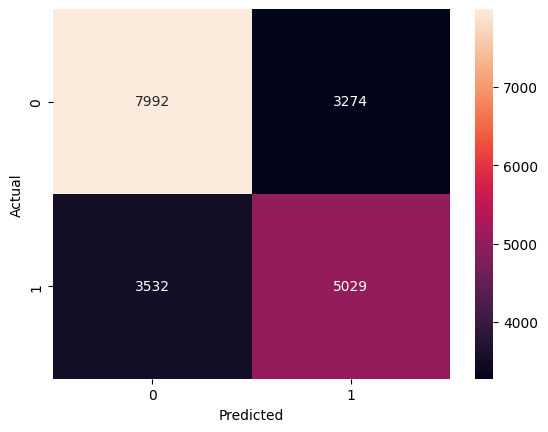

In [37]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
